In [1]:
#Import statements for various libraries
import pandas as pd #Pandas : To handle and manipulate dataset
import numpy as np #Numpy : To operate on arrays, here pandas Series
import matplotlib.pyplot as plt #Matplolib, Seaborn : To plot various graphs
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency
import math

In [2]:
df = pd.read_csv("NDAP_REPORT_7004.csv")

In [3]:
df.dropna(inplace=True) #Dropped all null values
df.reset_index(drop=True, inplace=True) #Resetting our index after dropping null values, inplace modifies our original dataframe
#While changing datatype of columns, it was identified that some columns had 'zero' as a value instead to numeric 0.
# These values were present in columns whose numeric count was greater than 900 so that is utilized as a condition
for col in df.columns.values: #Iterating over columns
    if len(pd.unique(df[col]))>900: #Used an observation mentioned above
        df[col]= df[col].replace('zero', '0').apply(pd.to_numeric).astype('int64') #.replace changes zero with 0, .apply(pd.to_numeric) changes each data to numeric value, .astype('int64') to change dtype
        #In real life, Number of houses can't be floating so it has been converted to int
df.drop(df[df['District lgd code'] > 10000].index, inplace=True)       

In [4]:
df

,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,Houses having plastic or polythene as material of wall,Houses having mud or unburnt brick as material of wall,Houses having wood as material of wall,Houses having stone not packed with mortar as material of wall,Houses having stone packed with mortar as material of wall,Houses having galvanized iron (gi) sheets or metal or asbestos sheets as material of wall,Houses having burnt brick as material of wall,Houses having concrete as material of wall,Houses having any other material of wall
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465,270,1331,22710,3014,3034,480,229,76229,1400,768
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522,69,121,6807,123,268,93,98,23789,1894,260
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561,134,168,7174,960,748,306,214,73342,1013,1498
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136,49,27,935,24,187,30,39,11297,454,94
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312,410,173,19207,3227,12552,5479,1740,72686,2118,2715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,1469,India,38,The Dadra And Nagar Haveli And Daman And Diu,463,Daman,2011,Urban,42352,202,150,426,95,72,185,130,39160,1927,5
1464,1470,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Rural,5410,6,0,50,2,238,5094,0,2,5,13
1465,1471,India,38,The Dadra And Nagar Haveli And Daman And Diu,464,Diu,2011,Urban,5279,11,1,6,0,165,4820,11,147,116,2
1466,1472,India,38,The Dadra And Nagar Haveli And Daman And Diu,465,Dadra And Nagar Haveli,2011,Rural,35408,16428,62,4939,145,113,74,96,12642,897,12


In [5]:
data = df['Houses having mud or unburnt brick as material of wall']/df['Number of census houses']*100 
#Calculated percentage row

In [6]:
data = data.dropna() #dropped null values

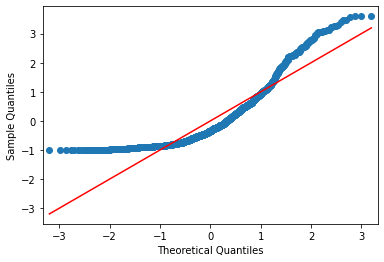

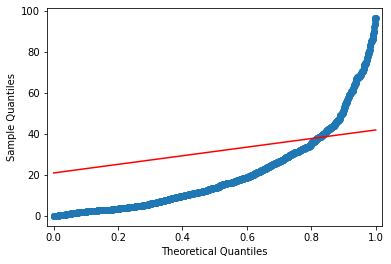

In [7]:
sm.qqplot(data, stats.norm, fit=True, line='s') #qqplot for normal dist
sm.qqplot(data, stats.uniform, fit=True, line='s') #qqplot for uniform dist
plt.show() #displayed

In [8]:
mean = data.mean() #Mean is an MLE
n = len(data)
std = data.std()*math.sqrt(n-1)/(math.sqrt(n)) #Unnormalized std for MLE
print("MLE Estimates for Gaussian:\nMean : "+ str(mean) + "\nDeviation : " +str(std))

MLE Estimates for Gaussian:
Mean : 20.96393145968795
Deviation : 20.989697704775054


In [9]:
a = data.min() #min is mle of uniform
b = data.max() # man is also mle for uniform
print("MLE Estimates for Uniform:\na : "+ str(a) + "\nb : " +str(b))

MLE Estimates for Uniform:
a : 0.0
b : 96.46096709592217


In [10]:
normlog = (((1437*(math.log(2*math.pi*std*std)))/2)+ (1473/2))*(-1) #Max log likelihood of normal
print(normlog)

-6431.288270898063


In [11]:
uniflog = n*math.log(1/(b-a)) #Max log likelihood of uniform
print(uniflog)

-6565.851938949313


Since Log Likelihood of Gaussian is greater than Log Likelihood of Uniform Distribution, Gaussian is a better fit for the data 

In [12]:
def customquartile(i):
    if(i<0.5 and i>=0): quartile = math.sqrt(2*i)-1 #calculated mathematically
    elif(i>=0.5 and i<=1): quartile = 1-math.sqrt(2-2*i) #calculated mathematically
    else: quartile = float("NaN") #NaN for illegal values
    return quartile
        

In [13]:
data = data.sort_values() #sorted data
data = data.reset_index(drop=True) #resetted index

In [14]:
xvalues = []
yvalues = []
end = len(data)-1
for i in range(0,end+1):
    yvalues.append(data[i])  #data[i] as yvalues
    xvalues.append(customquartile((i/end))) #custom quartile values as x values

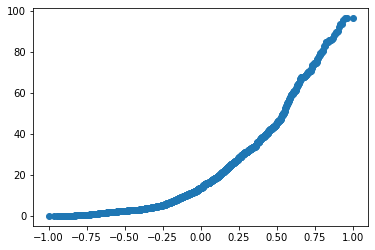

In [15]:
plt.scatter(xvalues, yvalues) #plotting qqplot
plt.show() #Displaying plot

In [16]:
ruraldf = df[df['Type of residence namely rural or urban'] == "Rural"] #Creating new dataframe with rows having Rural value
urbandf = df[df['Type of residence namely rural or urban'] == "Urban"] #Creating new dataframe with rows having Urban value

Lets say our significance value is 0.05

We perform 2 tail test to see if rural and urban data are statistically equal

In [17]:
rural = ruraldf['Houses having mud or unburnt brick as material of wall'].dropna()
urban = urbandf['Houses having mud or unburnt brick as material of wall'].dropna()
stats.ttest_ind(a=rural, b=urban, equal_var=True)

Ttest_indResult(statistic=19.7721777330968, pvalue=2.5657911381717052e-77)

Since our p value is drastically less than significance value, rural and urban data are not equal

In [18]:
ruralsum = ruraldf['Houses having mud or unburnt brick as material of wall'].sum() #Sum of rural houses
urbansum = urbandf['Houses having mud or unburnt brick as material of wall'].sum() #Sum of urban houses
totalsum = df['Number of census houses'].sum() #Total number of houses
ruralpercent = ruralsum/totalsum*100 #rural houses percentage
urbanpercent = urbansum/totalsum*100 #urban houses percentage
print("Rural Percent of Mud Houses : " + str(ruralpercent))
print("\nUrban Percent of Mud Houses : " + str(urbanpercent))

Rural Percent of Mud Houses : 20.834716865521624

Urban Percent of Mud Houses : 2.9723178844895926


Percentage of rural houses is greater than percentage of urban houses

In [19]:
len(rural)

736

In [20]:
len(urban)

731

In [21]:
rural.drop(rural.tail(5).index, inplace = True) #Just dropping excess data

Lets have the significance value of corr to be 0.5

In [30]:
corr, _ = stats.pearsonr(rural, urban) #Calculating correlation coefficient
print('Pearsons correlation: ' + str(corr)) 

Pearsons correlation: 0.22040297960975722


Since Pearson Correlation is less than significance value we can not sufficiently say that the rural and urban data are correlated